<img src="https://pbs.twimg.com/profile_images/997746419732639744/B2If50il_400x400.jpg">
# 	Introduction to Machine Learning
### Ali Alperen ASLAN 
### Kredi Kartı Uygulaması

<p>  İnternet kullanımının artmasıyla günümüzde bankalara kredi kartı başvuruları artmıştır.Bu başvurularının incelenmesi zaman  alıcıdır.Bu incelemeler sırasında dikkat kaybı gibi... nedenlerle hatalarda yapılmaktadır.Günümüzde bankalar başvuruların    incelenemsi makine öğrenmesi yöntemleri kullanılarak otomatikleştirilmiştir.
</p>
  <img src="Adsız.png">
<p> 
Projede <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Approval Data Set</a> banka veri seti üzerinde lojistik regresyon uygulayarak kredi kartı başvurularının onaylanması(1) veya reddedilmesini(0) tahmin edilecek.Projede yapılacaklar<br>
    1-)Veri setinin yüklenmesi  <br>
    2-)Veri setinin incelenemesi    <br>
    3-)Eksik verilerinin bulunması ve çıkarılması<br>
    4-)Verilerin görselleştirilmesi    <br>
    5-)Kategorik verilerin sayısal verilere dönüştürülmesi <br>
    6-)Future Selection <br>
    7-)Parameter Tuning
</p>

###  1-) Veri setinin yüklenmesi

In [11]:
## Kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV



import warnings
warnings.filterwarnings("ignore")

In [12]:
##Verinin yüklenmesi
data = pd.read_csv("datasets/cc_approvals.data", header=None)
## Bağımsız değişkenlerin labelları anlamsız olduğundan dolayı almadım.

### 2-) Veri setinin incelenemesi 
<p>
    Ön inceleme anlamında fikir edinebilmek için <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">blog</a> sayfasını inceledim.Blogda kolon isimlerinin  <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> ve <code>ApprovalStatus</code>  olarak adlandırılmıştır.
</p>

In [13]:
data.columns=['Gender','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore',
                'DriversLicense', 'Citizen','ZipCode','Income','ApprovalStatus']
data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [14]:
data.shape
## 15 adet bağımsız değişken ve bir sonuç değişkeni vardır.Sonuç değişkeni + ve - olarak verilmiştir.

(690, 16)

In [15]:
print(data.describe())
print("\n")
data.info()
## Veri setinde 16 kolon vardır.Bu kolonların 2-7-10-14 sayısal değerlerden, diğer kolonlar ise kategorik verilerden oluşturulmuştur.

             Debt  YearsEmployed  CreditScore         Income
count  690.000000     690.000000    690.00000     690.000000
mean     4.758725       2.223406      2.40000    1017.385507
std      4.978163       3.346513      4.86294    5210.102598
min      0.000000       0.000000      0.00000       0.000000
25%      1.000000       0.165000      0.00000       0.000000
50%      2.750000       1.000000      0.00000       5.000000
75%      7.207500       2.625000      3.00000     395.500000
max     28.000000      28.500000     67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            690 non-null object
Age               690 non-null object
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object


### 3-)Eksik verilerinin bulunması ve çıkarılması

In [16]:
data = data.replace("?",np.NaN)
data.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

In [9]:
## ? olan verileri np.Nan objesi olarak değiştirilmesi
data = data.replace("?",np.NaN)
## np.NaN değerlerin veri setinden çıkarılması
data.dropna(inplace=True)
## Eksik verilerin kontrolü
print(data.isnull().values.sum())

0


In [10]:
data.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

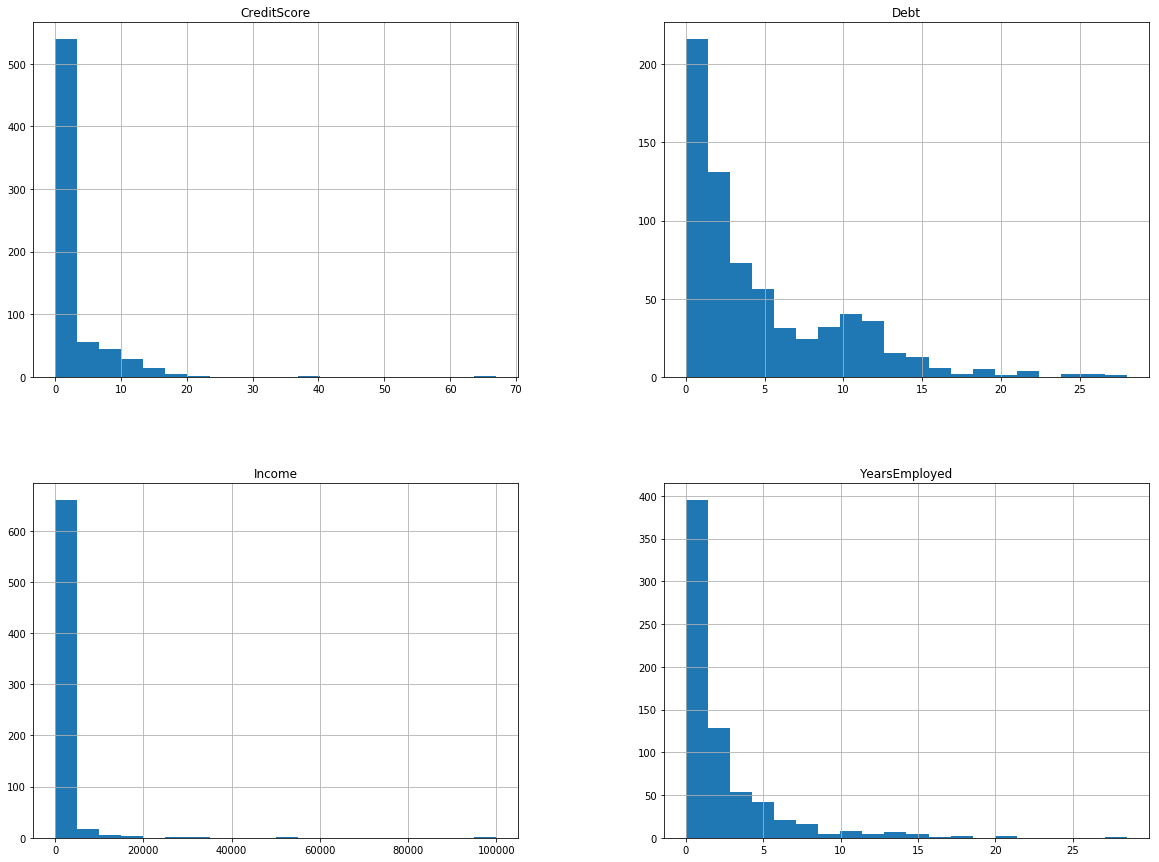

In [32]:
data.hist(bins=20, figsize=(20,15))
plt.show()

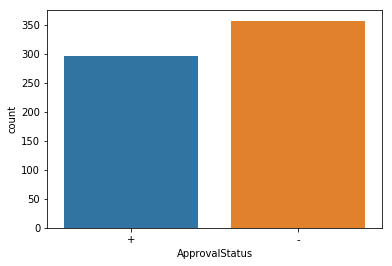

In [145]:
sns.countplot(x=data['ApprovalStatus'], data=data)

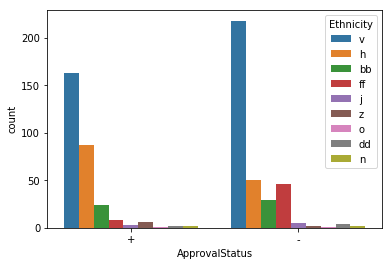

In [146]:
### ApprovalStatus dağılımı incelediğimizde veri setimizde nerdeyse eşit dağılmış şekilde 2 class olduğunu görebiliriz.
sns.countplot(x=data['ApprovalStatus'], hue = data['Ethnicity'], data=data)

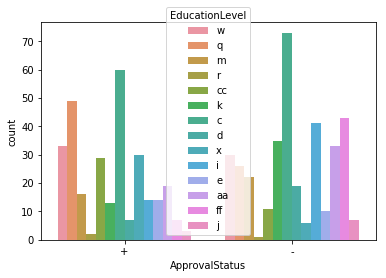

In [147]:
## Ethnicity 
sns.countplot(x=data['ApprovalStatus'], hue = data['EducationLevel'], data=data)

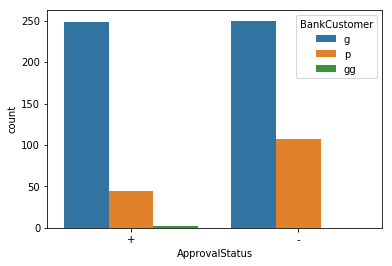

In [148]:
sns.countplot(x=data['ApprovalStatus'], hue = data['BankCustomer'], data=data)

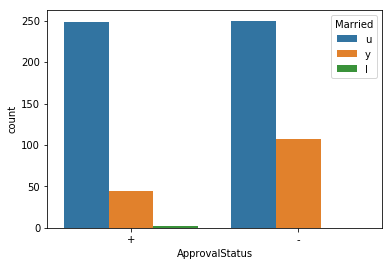

In [149]:
sns.countplot(x=data['ApprovalStatus'], hue = data['Married'], data=data)

### 5-) Kategorik verilerin sayısal verilere dönüştürülmesi

In [150]:
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype=='object':
        data[col]=le.fit_transform(data[col])

In [151]:
X,y = data.iloc[:,:-1], data.iloc[:,-1:]

In [152]:
X.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,153,0.000,1,0,12,7,1.25,1,1,1,0,0,68,0
1,0,321,4.460,1,0,10,3,3.04,1,1,6,0,0,11,560
2,0,88,0.500,1,0,10,3,1.50,1,0,0,0,0,94,824
3,1,123,1.540,1,0,12,7,3.75,1,1,5,1,0,31,3
4,1,42,5.625,1,0,12,7,1.71,1,0,0,0,2,37,0


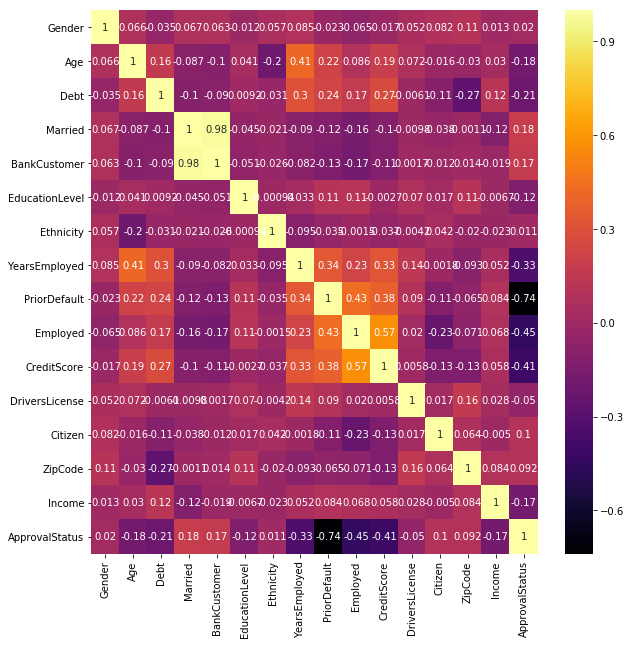

In [153]:
#Korelasyon Matrisi
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="inferno")

In [154]:
corr = data[top_corr_features].corr()
corr = abs(corr['ApprovalStatus'])
relevant_features = corr[corr>0.5]
relevant_features

PriorDefault      0.738829
ApprovalStatus    1.000000
Name: ApprovalStatus, dtype: float64

### 6-) Future Selection 

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LogisticRegression()


In [156]:
###  RFECV FUTURE SELECTİON
rfecv = RFECV(estimator=lr, min_features_to_select=5, step=1, cv=5,scoring='accuracy')
rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)


#plt.figure()
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross validation score (nb of correct classifications)")
#plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
#plt.show()

Optimal number of features : 8


In [157]:
rfecv.support_

array([False, False, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False, False])

In [158]:
### Rfecv sonuç olarak
print("Train Score",rfecv.score(X_train, y_train))
print("Test Score",rfecv.score(X_test, y_test))


Train Score 0.8650306748466258
Test Score 0.8963414634146342


In [159]:
for i,j in zip(rfecv.support_, X.columns):
    if i == True:
        print(j)


Married
BankCustomer
YearsEmployed
PriorDefault
Employed
CreditScore
DriversLicense
Citizen


In [160]:
## RFE FUTURE SELECTİON
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
best = 0
for i in range(1,15):
    rfe = RFE(lr,i)
    temp =cross_val_score(rfe, X_train, y_train, cv=5, scoring='accuracy').mean()
    if best < temp:
        best = temp
        print(i)
        print("Best Train : \n ",cross_val_score(rfe, X_train, y_train, cv=5, scoring='accuracy').mean() )
        print("Best Test : \n",cross_val_score(rfe, X_test, y_test, cv=5, scoring='accuracy').mean())
        print("--------------------")



1
Best Train : 
  0.8547594607977524
Best Test : 
 0.8901515151515152
--------------------
3
Best Train : 
  0.856800277124283
Best Test : 
 0.8903409090909091
--------------------
7
Best Train : 
  0.8589042114815311
Best Test : 
 0.865909090909091
--------------------


[0.01577626 0.04758449 0.05002297 0.01234891 0.01610012 0.06118529
 0.03873556 0.07513424 0.37171766 0.10521304 0.04498875 0.01794666
 0.01390322 0.06219786 0.06714497]


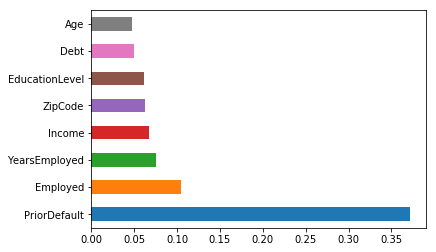

In [162]:
#### Future Selection 3

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()


In [163]:
X_new = X[['Income','EducationLevel','Age','Debt','YearsEmployed','Employed','PriorDefault']]

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=0)

In [165]:
### 7 değişkenli Acc sonuçları  ['Income','EducationLevel','Age','Debt','YearsEmployed','Employed','PriorDefault']
clf = LogisticRegression().fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.85
Accuracy of Logistic regression classifier on test set: 0.88


### 7-) GridSearchCV (Parameter Tuning)

In [129]:
from sklearn.model_selection import GridSearchCV

grid={  
        'penalty' : ['l2'],
        'C':[0.001,.009,0.01,1.5,1.7,1.75,1.8,2,2.1,3,5],
        'solver' : ['lbfgs','liblinear','newton-cg','sag','saga'],
        
     }

logreg=LogisticRegression()
grid_clf_acc = GridSearchCV(logreg, param_grid = grid,scoring = 'accuracy',cv=5, verbose=True,  n_jobs=-1)
grid_clf_acc.fit(X_train, y_train)

Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed:   11.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l2'], 'C': [0.001, 0.009, 0.01, 1.5, 1.7, 1.75, 1.8, 2, 2.1, 3, 5], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=True)

In [166]:
print('Best C:', grid_clf_acc.best_estimator_.get_params()['C'])
print('Best solver:', grid_clf_acc.best_estimator_.get_params()['solver'])



Best C: 1.7
Best solver: lbfgs


In [167]:
print(grid_clf_acc.score(X_train, y_train))
grid_clf_acc.score(X_test, y_test)

0.8548057259713702


0.8841463414634146

In [168]:
y_test['ApprovalStatus'].value_counts()

1    89
0    75
Name: ApprovalStatus, dtype: int64

In [169]:
from sklearn.metrics import confusion_matrix
predictions = grid_clf_acc.predict(X_test)
confusion_matrix = confusion_matrix(y_test,predictions )

In [170]:
df_cm = pd.DataFrame(
        confusion_matrix, index=['NEGATİVE','POSİTİVE'], columns=['NEGATİVE','POSİTİVE'], )

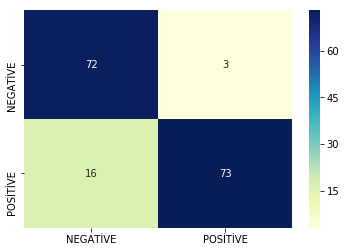

In [171]:
heatmap = sns.heatmap(df_cm, annot=True, cmap="YlGnBu")

ref1 : http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html <br>
ref2 : https://www.datacamp.com/projects/558